# 1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# 한글 폰트 설정 (예: 맑은 고딕)
matplotlib.rc('font', family='Malgun Gothic')

# 마이너스(-) 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False


In [2]:
df = pd.read_parquet("../02_data/05_parquet/merged_log.parquet")

# 2. EDA

## 2-1. 총 방문일 수에 따른 고유 방문자 수

### 1) 날짜와 시간대 컬럼 추가

In [58]:
# UTC -> KST 변환을 위해 9시간 더해주기
# df['Asia/Seoul'] = df['Asia/Seoul'] + timedelta(hours=9)

# 날짜만 확인하기 위해 date 라는 날짜만 존재하는 컬럼을 새롭게 생성
df['hour'] = df['Asia/Seoul'].dt.hour
df['date'] = df['Asia/Seoul'].dt.date
df.sample(2)

,Asia/Seoul,event_key,device_id,hour,date
174900,2023-06-21 08:17:55,launch_app,175673eb-7657-4daf-8179-cef4470d78e7,8,2023-06-21
31569108,2023-08-24 20:32:37,view_timeline_tap,97619557-0D13-4B79-B64D-C8FB568919D9,20,2023-08-24


### 2) 방문날짜에 따른 고유 방문자 데이터 구하기

In [94]:
# 방문일 수에 따른 고유 방문자수를 확인하기 위해 아무 event_key라도 존재하면 어플에 접속한걸로 간주함
# 따라서 device_id와 date 두 컬럼을 동시에 중복을 제거하여 유저 한명의 하루 기록씩만 남기도록 한다.
drop_df = df.drop_duplicates(subset=['device_id', 'date'])
print(f"방문날짜에 따른 고유 방문자 총 합계 : {len(drop_df)}명")
display(drop_df)

방문날짜에 따른 고유 방문자 총 합계 : 1965848명


,Asia/Seoul,event_key,device_id,hour,date
0,2023-06-18 00:07:08,$session_start,8B6F9E35-473D-45D7-B8AD-884359609FDD,0,2023-06-18
2,2023-06-18 00:07:34,$session_start,4FF18855-0DE6-4E51-A00C-7CDFE36BFC64,0,2023-06-18
3,2023-06-18 01:01:12,$session_start,99A6DE2D-D222-46FF-81C2-729DAFF8E688,1,2023-06-18
5,2023-06-18 02:52:14,$session_end,A19C65FF-3012-40EC-8162-01FF6903F762,2,2023-06-18
7,2023-06-18 10:15:45,$session_end,7f693610-55c0-4209-81c8-5b4270414a6e,10,2023-06-18
...,...,...,...,...,...
33163757,2023-09-03 23:59:19,$session_start,B4A0E399-126B-4632-B13E-BD24526858CB,23,2023-09-03
33163766,2023-09-03 23:59:21,launch_app,1a8715ef-bd2a-4e0f-b413-073e0947d25d,23,2023-09-03
33163880,2023-09-03 23:59:35,launch_app,610A7DDC-3F3F-4A3D-982C-E7E1B237CFAC,23,2023-09-03
33163946,2023-09-03 23:59:47,$session_start,02e7a999-62e9-4fa2-983c-42abd1a44584,23,2023-09-03


In [95]:
# 유저별 중복을 제외하고 총 방문한 날의 수수
datecount_per_id = drop_df.groupby('device_id')['date'].count().reset_index(name='count')
datecount_per_id

,device_id,count
0,0000065B-8C82-4982-B67E-AC67B1E4C38E,11
1,000007C9-E103-4EB5-9777-A9084D4952DF,3
2,00002245-458F-4CDD-8533-B448CD43DBD2,4
3,00004f65-e8bd-4a40-98af-202f2929dd6d,1
4,00005A56-8CCF-4240-90A0-04FBCF90A45B,2
...,...,...
429296,fffb7b4c-c13b-4b75-b99b-88d0ee5e4208,2
429297,fffbb1b6-7c67-4a49-9079-5bbd7098163f,6
429298,fffc50a3-e47a-4bab-99d8-014a89437147,1
429299,fffc86f4-1a4e-40eb-83bf-2721573a0148,34


### 3) 고유 방문자 수 그래프 시각화

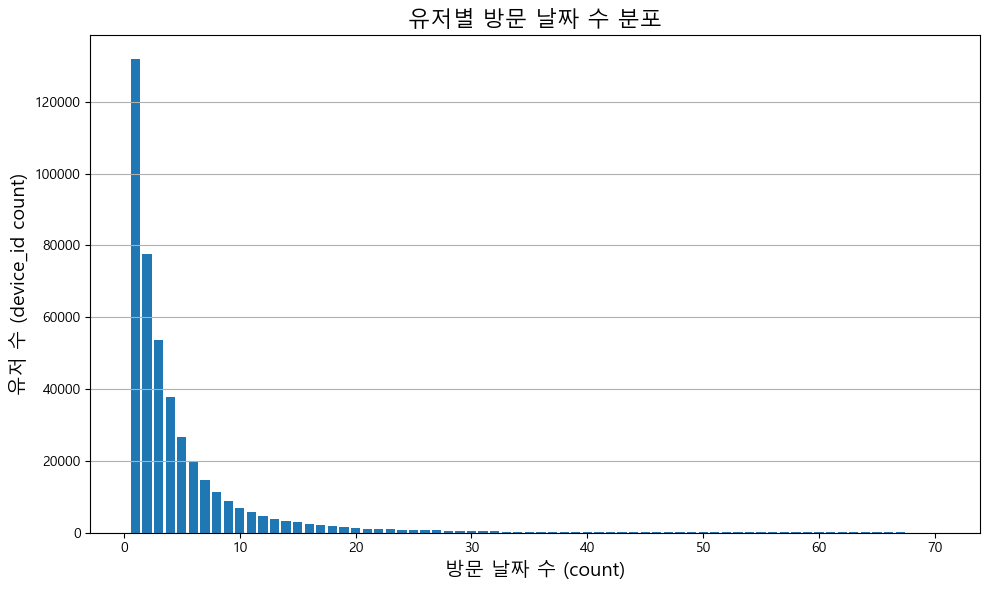

In [96]:
# 1️⃣ count별 device_id 수 집계
count_summary = datecount_per_id['count'].value_counts().sort_index()

# 2️⃣ 시각화
plt.figure(figsize=(10, 6))
plt.bar(count_summary.index, count_summary.values)
plt.xlabel('방문 날짜 수 (count)', fontsize=14)
plt.ylabel('유저 수 (device_id count)', fontsize=14)
plt.title('유저별 방문 날짜 수 분포', fontsize=16)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [104]:
count_summary_df = pd.DataFrame(count_summary[:30])
count_summary_df.to_csv("30days_visit_count.csv", encoding='cp949')

### 4) 그래프 해석 결과
- 전체 방문자 수 : 429,301명

**1. 하루만 방문한 유저**
- 하루만 방문한 유저의 수 : 133,023명
- 하루만 방문하고 이탈한 유저의 비율 : 30.98%

**2. 이틀만 방문한 유저**
- 이틀만 방문한 유저의 수 : 78,013명
- 이틀만 방문하고 이탈한 유저의 비율 :  18.17%

**3. 삼일만 방문한 유저**
- 삼일만 방문한 유저의 수 : 53,825명
- 삼일만 방문하고 이탈한 유저의 비율 : 12.54%

**4. 4일을 넘기지 못하고 이탈한 유저의 수와 비율**
- 3일만에 이탈한 총 유저 수 집계 : 264,861명
- 3일만에 이탈한 총 유저의 비율 : 61.70%


## 2-2. 이벤트 종류별 분포

### 1) 이벤트키 발생 횟수 확인

In [78]:
# 이벤트키의 개수 확인
event_key_count = df['event_key'].value_counts().sort_values(ascending=False).reset_index(name='count')
event_key_count.head()

,event_key,count
0,view_home_tap,4073162
1,$session_start,3289061
2,launch_app,2946516
3,view_timeline_tap,2710995
4,$session_end,2151015


### 2) 그래프 시각화

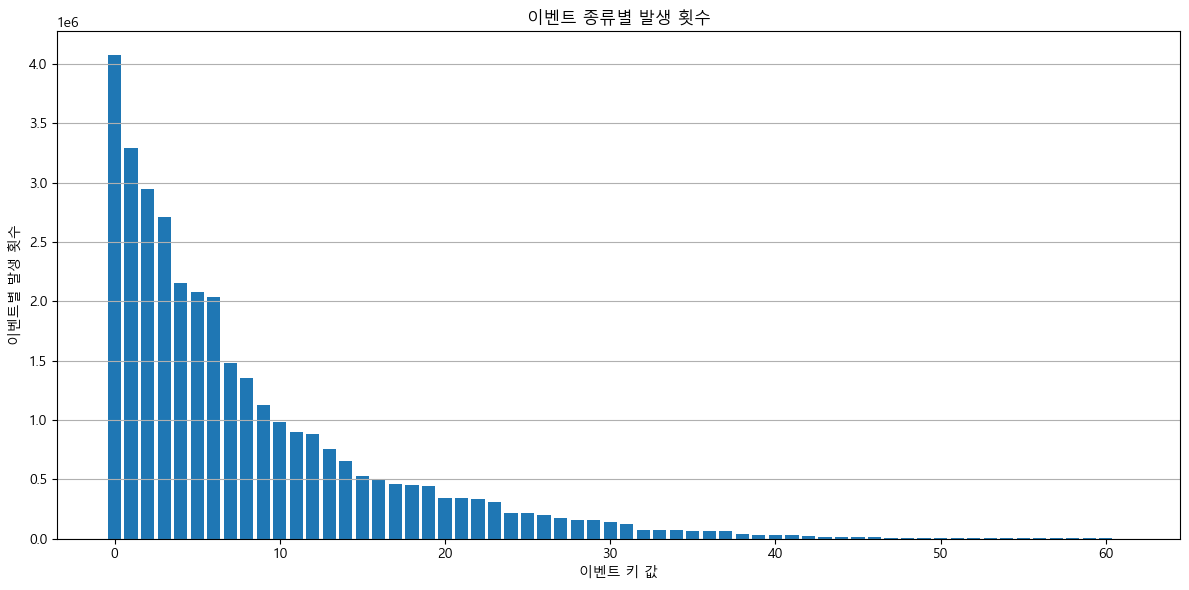

In [79]:
x = event_key_count.index
y = event_key_count['count']

plt.figure(figsize=(12,6))
plt.bar(x, y)
plt.title("이벤트 종류별 발생 횟수")
plt.xlabel('이벤트 키 값')
plt.ylabel('이벤트별 발생 횟수')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 3) 결과 확인
이벤트 키 값 중에서 필수적으로 발생하는 이벤트 키
- $session_start, $session_end, launch_app, $properties, view_home_tap
- 위에 5개 이벤트키는 제외하고 다시 순위를 확인

In [80]:
# 제외할 이벤트 키 리스트
exclude_keys = ['$session_start', '$session_end', 'launch_app', '$properties', 'view_home_tap']

# 제외한 이벤트 키
filter_event_key_count = event_key_count[~event_key_count['event_key'].isin(exclude_keys)]

filter_event_key_count.reset_index().sort_values('count', ascending=False).drop(columns='index')[:10]

,event_key,count
0,view_timeline_tap,2710995
1,click_question_open,2079068
2,view_questions_tap,2033833
3,view_lab_tap,1483713
4,view_message_tap,1352609
5,view_profile_tap,1130089
6,click_bottom_navigation_questions,985101
7,click_bottom_navigation_profile,901220
8,skip_question_question,879481
9,click_bottom_navigation_timeline,754122


## 2-3. 유저 클러스터링

### 1) 데이터 전처리
event_key값에 어플의 기본 실행과 관련된 key는 제외하고 분석을 진행

In [21]:
# 기본적으로 발생할 수밖에 없는 이벤트를 제외하고  유저들이 어떤 행동을 자주 했는지 확인하려고 한다.
# 제외할 event명 리스트
exclude_events = ['$session_start', '$session_end', 'launch_app', '$properties', 'view_home_tap']

# 필터링된 데이터
filtered_df = df[~df['event_key'].isin(exclude_events)]

# device_id별 event_key 합계 구하기
device_event_counts = (
    filtered_df.groupby('device_id')['event_key']
    .size()
    .sort_values(ascending=False)
    .reset_index(name='event_key_counts')
)

device_event_counts.head(2)

,device_id,event_key_counts
0,cfa76079-ab4e-4ea1-a7df-38ceaa5ef011,13442
1,75d3d156-ec70-4a0f-9070-e46aefeb79e0,10113


### 2) 클러스터링 진행

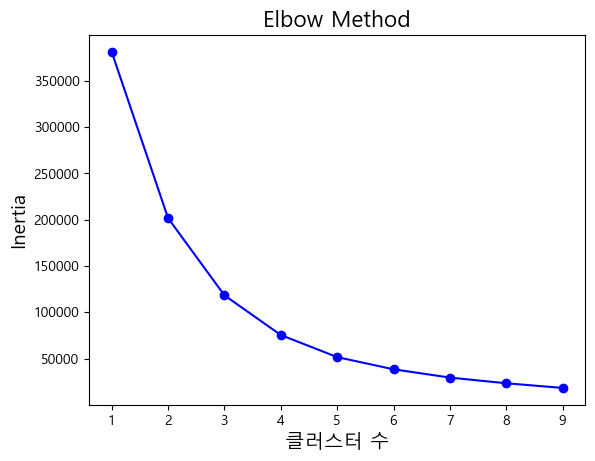

In [220]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. 데이터 준비
X = device_event_counts[['event_key_counts']].values

# 2. 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 최적 클러스터 수 찾기 (Elbow method)
#  inertia (관성, 총 오차 제곱합)를 담을 빈 리스트를 만든다.
# 이 값은 클러스터 안에서 각 점이 중심까지 얼마나 퍼져 있는지를 나타냄.
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  #데이터를 클러스터링
    inertia.append(kmeans.inertia_) #클러스터 중심에서 각 점까지의 거리 제곱합 (총 오차 제곱합)을 inertia 리스트에 넣는다

plt.plot(K, inertia, 'bo-')
plt.xlabel('클러스터 수', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.title('Elbow Method', fontsize=16)
plt.show()

In [221]:
# 4. 최적 k로 클러스터링 (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
device_event_counts['cluster'] = kmeans.fit_predict(X_scaled)

# 5. 결과 확인
device_event_counts.groupby('cluster')['event_key_counts'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,369642.0,37.396335,43.801321,1.0,9.0,21.0,48.0,252.0
1,11156.0,466.650412,242.923246,253.0,300.0,376.0,540.0,1502.0
2,459.0,2548.496732,1335.710848,1509.0,1725.0,2106.0,2772.0,13442.0


In [222]:
# 필터링 된 유저 이벤트 데이터에 유저별 클러스터 라벨링해주기
filtered_cluster_df = filtered_df.merge(device_event_counts[['device_id', 'cluster']], on='device_id', how='left')

filtered_cluster_df.sample(2)

,Asia/Seoul,event_key,device_id,hour,date,weekday,cluster
1990149,2023-06-23 22:08:53,skip_question_question,597E5F1F-8A96-428A-AE3C-743BC1499606,22,2023-06-23,Friday,1
14501268,2023-08-03 14:15:55,click_bottom_navigation_questions,7CED681D-5D78-4E5C-A5A2-D869E2D7AB98,14,2023-08-03,Thursday,0


### 3) 클러스터별 구매페이지 접근, 결제율 분석

In [224]:
# 구매 페이지와 구매완료를 진행한 유저가 어떤 클러스터에 들어가 있는지 확인
purchase_df = filtered_cluster_df[filtered_cluster_df['event_key'].isin(['complete_purchase','click_purchase'])]

# 클러스터별 중복을 제외한 유저의 수 확인인
only_cluster_user_counts = filtered_cluster_df.drop_duplicates(subset='device_id')['cluster'].value_counts()

# 클러스터별 구매 페이지 접근 비율
print(f"라이트 유저의 구매 페이지 접근 비율 : {purchase_df[purchase_df['event_key'] == 'click_purchase']['cluster'].value_counts().values[0] / only_cluster_user_counts.values[0] * 100:.3f}%")
print(f"미들 유저의 구매 페이지 접근 비율 : {purchase_df[purchase_df['event_key'] == 'click_purchase']['cluster'].value_counts().values[1] / only_cluster_user_counts.values[1] * 100:.3f}%")
print(f"헤비 유저의 구매 페이지 접근 비율 : {purchase_df[purchase_df['event_key'] == 'click_purchase']['cluster'].value_counts().values[2] / only_cluster_user_counts.values[2] * 100:.3f}%")
print("-----------------------------")
# 클러스터별 하트 결제 완료 비율
print(f"라이트 유저의 결제율 : {purchase_df[purchase_df['event_key'] == 'complete_purchase']['cluster'].value_counts().values[0] / only_cluster_user_counts.values[0] * 100:.3f}%")
print(f"미들 유저의 결제율 : {purchase_df[purchase_df['event_key'] == 'complete_purchase']['cluster'].value_counts().values[1] / only_cluster_user_counts.values[1] * 100:.3f}%")
print(f"헤비 유저의 결제율 : {purchase_df[purchase_df['event_key'] == 'complete_purchase']['cluster'].value_counts().values[2] / only_cluster_user_counts.values[2] * 100:.3f}%")

라이트 유저의 구매 페이지 접근 비율 : 6.326%
미들 유저의 구매 페이지 접근 비율 : 68.430%
헤비 유저의 구매 페이지 접근 비율 : 141.176%
-----------------------------
라이트 유저의 결제율 : 0.639%
미들 유저의 결제율 : 4.105%
헤비 유저의 결제율 : 4.793%


### 4) 클러스터별 방문일 수

In [ ]:
# 유저가 어떤 경로로 어플에 접속했든 방문을 했다는 것을 보기 위해  device_id랑 date가 같으면 중복으로 제거
drop_filtered_cluster_df = filtered_cluster_df.drop_duplicates(subset=['device_id','date'])

print(f"라이트 유저(cluster=0)의 평균 방문일 수 : {drop_filtered_cluster_df[drop_filtered_cluster_df['cluster'] == 0].groupby('device_id')['date'].count().mean():.2f}일")
print(f"미들 유저(cluster=1)의 평균 방문일 수 : {drop_filtered_cluster_df[drop_filtered_cluster_df['cluster'] == 1].groupby('device_id')['date'].count().mean():.2f}일")
print(f"헤비 유저(cluster=2)의 평균 방문일 수 : {drop_filtered_cluster_df[drop_filtered_cluster_df['cluster'] == 2].groupby('device_id')['date'].count().mean():.2f}일")



라이트 유저(cluster=0)의 평균 방문일 수 : 3.18일
미들 유저(cluster=1)의 평균 방문일 수 : 22.46일
헤비 유저(cluster=2)의 평균 방문일 수 : 43.29일


In [ ]:
drop_filtered_cluster_df[drop_filtered_cluster_df['cluster'] == 0]

,Asia/Seoul,event_key,device_id,hour,date,weekday,cluster
20098823,2023-09-03 09:47:18,view_login,1fc44397-2803-43ed-8ef9-937b3c3ea791,9,2023-09-03,Sunday,1


In [250]:
low_user = drop_filtered_cluster_df[drop_filtered_cluster_df['cluster'] == 1].groupby('device_id')['date'].count().reset_index()

low_user[low_user['date'] == 1]

,device_id,date
771,11B87771-0434-45BA-962E-3D6D955946AD,1
1050,18994F19-BDC5-4132-B0CD-D80930A83151,1
1359,1fc44397-2803-43ed-8ef9-937b3c3ea791,1
1759,28A6CEF9-C83C-42AD-93A2-B7B698C335E2,1
2520,3A77BFD7-DE76-46D0-9078-8364E59441F8,1
2526,3ABB0CD6-91FA-4DA9-84E3-4FFCC23ED263,1
3292,4ECA6DDA-BF0A-4375-9C93-2B0826C68FED,1
3802,57da7a9a-d9de-4553-a4b8-c11687c9f1e5,1
3969,5D148923-9850-43EB-8D2E-F888FD3A7CFB,1
4213,60c5935d-fd96-4e7c-b076-3dfab156798a,1


## 2-4. 시간대/날짜별 이벤트

### 1) 하루 중 언제 이벤트가 몰리는지 확인

In [79]:
workday_csv = workday_df.groupby('hour')['event_key'].count().reset_index(name='workday_count')
# workday_csv.to_csv("workday_hour.csv", index=False)

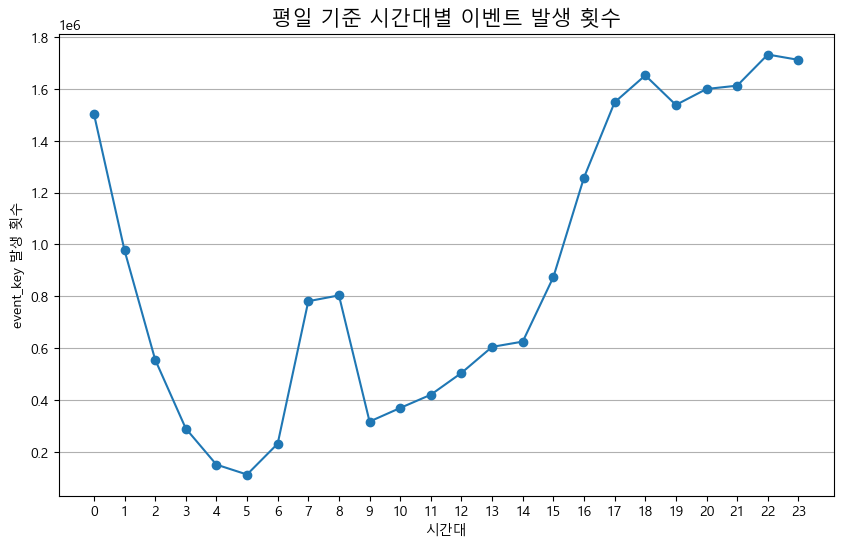

In [ ]:
# df['weekday'] = df['Asia/Seoul'].dt.day_of_week
workday_df = df[~df['weekday'].isin([5, 6])]
plt.figure(figsize=(10, 6))
plt.plot(workday_df.groupby('hour')['event_key'].count().index, workday_df.groupby('hour')['event_key'].count().values, marker='o')
plt.xlabel("시간대". fontsize=14)
plt.ylabel("event_key 발생 횟수". fontsize=14)
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.title("평일 기준 시간대별 이벤트 발생 횟수", fontsize=16)
plt.show()

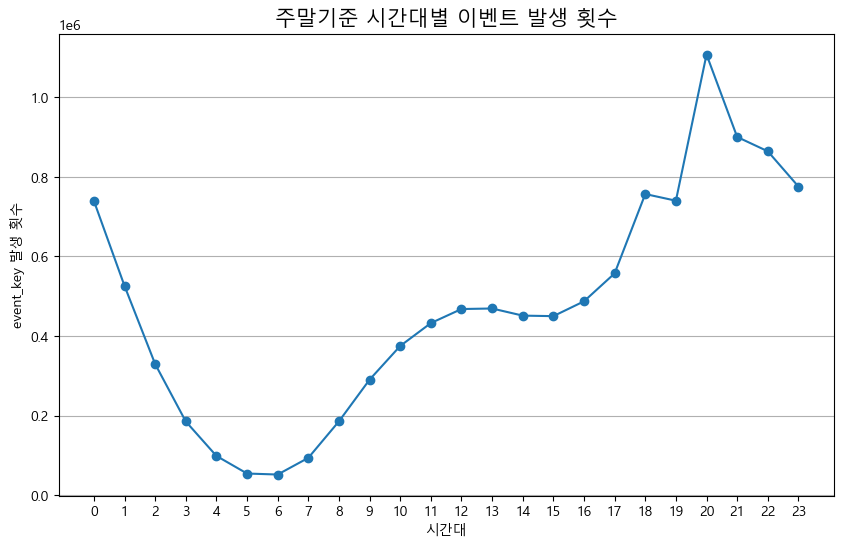

In [66]:
# df['weekday'] = df['Asia/Seoul'].dt.day_of_week
# holiday_df = df[df['weekday'].isin([5, 6])]
plt.figure(figsize=(10, 6))
plt.plot(holiday_df.groupby('hour')['event_key'].count().index, holiday_df.groupby('hour')['event_key'].count().values, marker='o')
plt.xlabel("시간대")
plt.ylabel("event_key 발생 횟수")
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.title("주말기준 시간대별 이벤트 발생 횟수", fontsize=15)
plt.show()

In [77]:
holiday_csv = holiday_df.groupby('hour')['event_key'].count().reset_index(name='holiday_count')
# holiday_csv.to_csv("holiday_hour.csv", index=False)

In [84]:
merged_use_hour = holiday_csv.merge(workday_csv, on='hour', how='left')
merged_use_hour.to_csv("merged_use_hour.csv", index=False)
# merged_use_hour

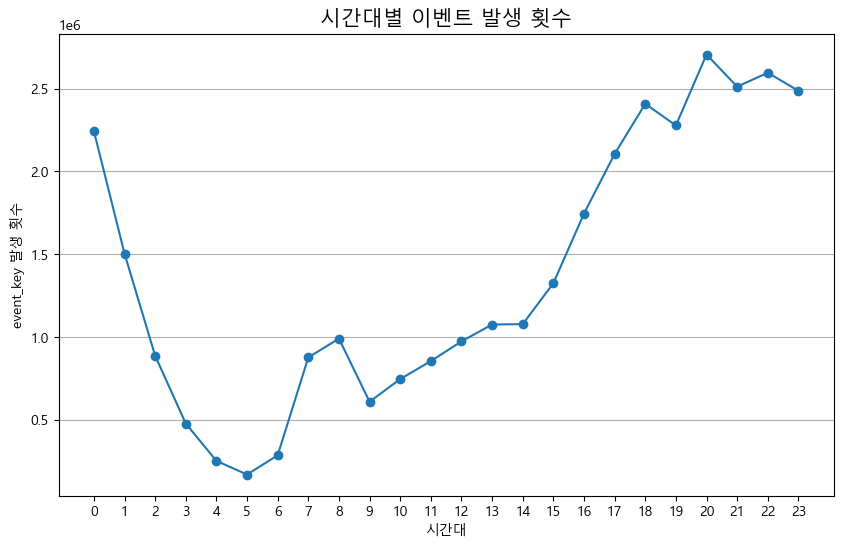

In [92]:
plt.figure(figsize=(10, 6))
plt.plot(df.groupby('hour')['event_key'].count().index, df.groupby('hour')['event_key'].count().values, marker='o')
plt.xlabel("시간대")
plt.ylabel("event_key 발생 횟수")
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.title("시간대별 이벤트 발생 횟수", fontsize=15)
plt.show()

### 2) 요일별 이벤트 빈도

In [ ]:
# 요일명 컬럼 추가 weekday
df['weekday'] = df['Asia/Seoul'].dt.day_name()
df.sample(3)

,Asia/Seoul,event_key,device_id,hour,date,weekday
25168881,2023-08-01 23:29:52,click_question_open,F8997321-07AE-43A2-BF23-A227A2A94E97,23,2023-08-01,Tuesday
4737105,2023-06-24 13:48:03,click_question_ask,B7FA2B78-EF8D-46AD-BA5F-73324C75DB25,13,2023-06-24,Saturday
12410601,2023-07-02 00:30:30,view_home_tap,44BE5CDD-5F86-47A1-B3AA-F8D1304774FC,0,2023-07-02,Sunday


In [ ]:
# 그래프 시각화 진행
weekday_event_count = df.groupby('weekday')['event_key'].count().reset_index(name='count')

# 원하는 요일 순서 지정
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# weekday 컬럼을 원하는 순서로 지정
weekday_event_count['weekday'] = pd.Categorical(weekday_event_count['weekday'], categories=weekday_order, ordered=True)

# 정렬
weekday_event_count = weekday_event_count.sort_values('weekday')

weekday_event_count

,weekday,count
1,Monday,3475507
5,Tuesday,4051102
6,Wednesday,3546267
4,Thursday,5395581
0,Friday,5308349
2,Saturday,5896761
3,Sunday,5490411


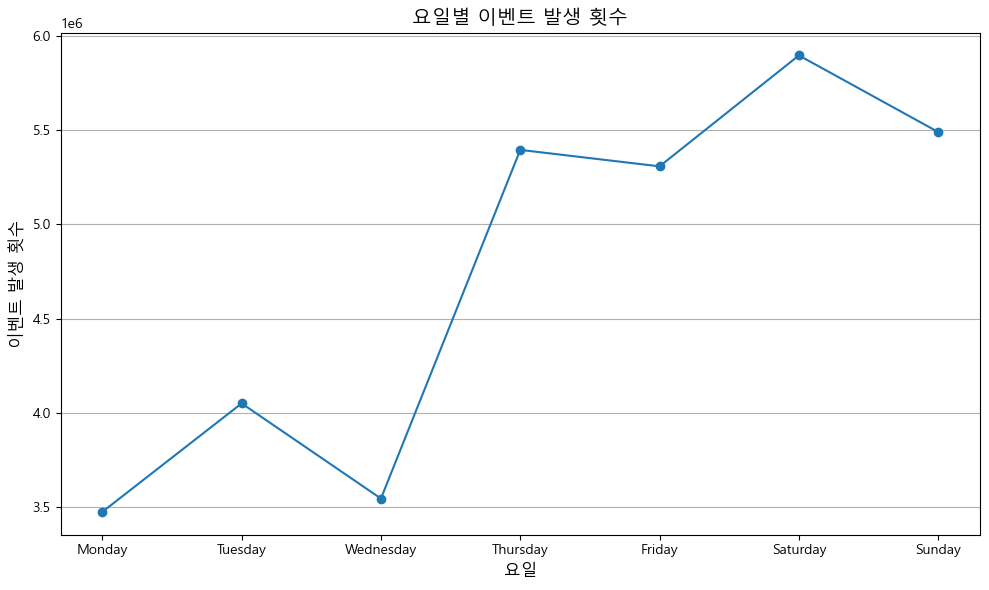

In [122]:
plt.figure(figsize=(10,6))
plt.plot(weekday_event_count['weekday'], weekday_event_count['count'], marker='o')
plt.xlabel("요일", fontsize=12)
plt.ylabel("이벤트 발생 횟수", fontsize=12)
plt.title("요일별 이벤트 발생 횟수", fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [133]:
# 전체 요일 중에서 월, 화, 수요일의 이벤트키 발생 비율
print(f"전체 요일 중 월,화,수요일 이벤트 키 발생 비율 : {weekday_event_count['count'][:3].sum() / weekday_event_count['count'].sum() * 100:.2f}%")
# 전체 요일 중에서 목, 금, 토, 일요일의 이벤트키 발생 비율
print(f"전체 요일 중 목,금,토,일요일 이벤트 키 발생 비율 : {weekday_event_count['count'][3:].sum() / weekday_event_count['count'].sum() * 100:.2f}%")
# 주말 이벤트 발생 비율
print(f"전체 요일 중 토,일요일 이벤트 키 발생 비율 : {weekday_event_count['count'][5:].sum() / weekday_event_count['count'].sum() * 100:.2f}%")

전체 요일 중 월,화,수요일 이벤트 키 발생 비율 : 33.39%
전체 요일 중 목,금,토,일요일 이벤트 키 발생 비율 : 66.61%
전체 요일 중 토,일요일 이벤트 키 발생 비율 : 34.34%


### 3) 일자별 이벤트 변화(질문투표의 횟수가 날이갈수록 줄어드는가?)

In [3]:
# 질문에 투표하는 event_key만 가져오기
question_event_key = ['click_question_start', 'click_question_ask']

question_event_key_df = df[df['event_key'].isin(question_event_key)]

question_event_key_count_df = question_event_key_df.groupby('date')['event_key'].value_counts().reset_index()

question_event_key_count_df.head(4)


KeyboardInterrupt



In [174]:
question_event_key_ask_df = question_event_key_df[question_event_key_df['event_key'] == 'click_question_ask']
question_event_key_start_df = question_event_key_df[question_event_key_df['event_key'] == 'click_question_start']

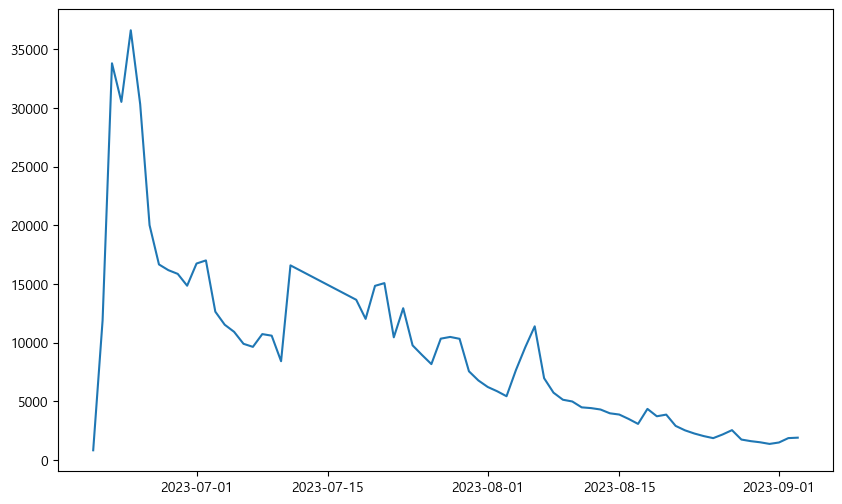

In [179]:
# 그래프 시각화
plt.figure(figsize=(10,6))
plt.plot(question_event_key_start_df.groupby('date')['event_key'].count().index, question_event_key_start_df.groupby('date')['event_key'].count().values)

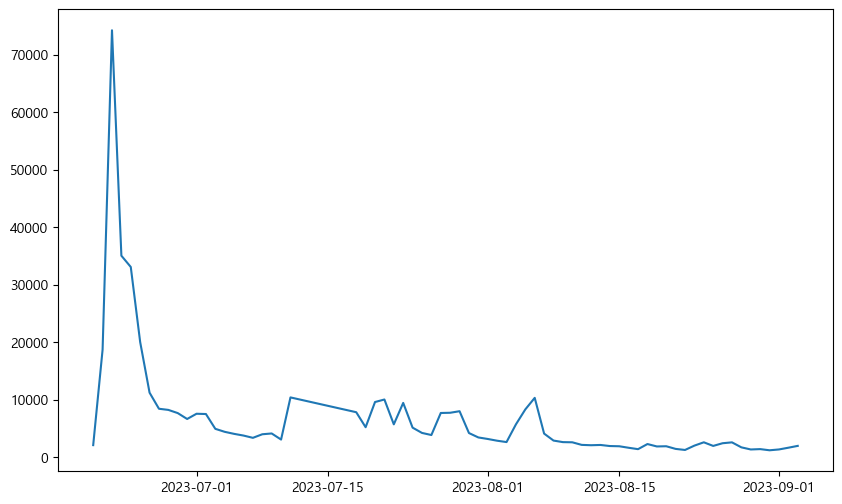

In [180]:
# 그래프 시각화
plt.figure(figsize=(10,6))
plt.plot(question_event_key_ask_df.groupby('date')['event_key'].count().index, question_event_key_ask_df.groupby('date')['event_key'].count().values)

In [ ]:
# signup 데이터랑 같이 비교교
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

# 첫 번째 y축 (왼쪽): Complete Signup
color1 = 'tab:blue'
line1, = ax1.plot(merged_counts['date'], merged_counts['signup_count'], color=color1, marker='o', label='Complete Signup')
ax1.set_xlabel('날짜', fontsize=14)
ax1.set_ylabel('Complete Signup', color=color1, fontsize=14)
ax1.tick_params(axis='y', labelcolor=color1)

# 두 번째 y축 (오른쪽): Question Events
ax2 = ax1.twinx()
color2 = 'tab:red'
line2, = ax2.plot(merged_counts['date'], merged_counts['question_count'], color=color2, marker='s', label='Question Events')
ax2.set_ylabel('Question Events', color=color2, fontsize=14)
ax2.tick_params(axis='y', labelcolor=color2)

# 두 축의 legend 합치기 (오른쪽으로 이동)
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper right')

# 그래프 제목, x축 라벨 꾸미기
plt.title('날짜별 Complete Signup vs Question Events', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## 2-5. 구매까지 진행한 유저 확인

### 1) 구매 완료까지 한 데이터 확인

## 2-6. 클러스터링 재진행

### 1) 클러스터링용 마스터 테이블 (디바이스별 이벤트 키 발생 횟수)

In [21]:
# 기본적으로 발생할 수밖에 없는 이벤트를 제외하고  유저들이 어떤 행동을 자주 했는지 확인하려고 한다.
# 제외할 event명 리스트
exclude_events = ['$session_start', '$session_end', 'launch_app', '$properties', 'view_home_tap']

# 필터링된 데이터
filtered_df = df[~df['event_key'].isin(exclude_events)]

# device_id별 event_key 합계 구하기
device_event_counts = (
    filtered_df.groupby('device_id')['event_key']
    .size()
    .sort_values(ascending=False)
    .reset_index(name='event_key_counts')
)

device_event_counts.head(2)

,device_id,event_key_counts
0,cfa76079-ab4e-4ea1-a7df-38ceaa5ef011,13442
1,75d3d156-ec70-4a0f-9070-e46aefeb79e0,10113


### 2) 디바이스별 방문날 횟수

In [4]:
df['date'] = df['Asia/Seoul'].dt.date
user_visit_date_count = df.groupby(['device_id', 'date'])['event_key'].count().reset_index()
user_visit_date_count = user_visit_date_count.groupby('device_id')['date'].count().reset_index(name='visit_count')

In [5]:
user_visit_date_count

,device_id,visit_count
0,0000065B-8C82-4982-B67E-AC67B1E4C38E,11
1,000007C9-E103-4EB5-9777-A9084D4952DF,3
2,00002245-458F-4CDD-8533-B448CD43DBD2,4
3,00004f65-e8bd-4a40-98af-202f2929dd6d,1
4,00005A56-8CCF-4240-90A0-04FBCF90A45B,2
...,...,...
429296,fffb7b4c-c13b-4b75-b99b-88d0ee5e4208,2
429297,fffbb1b6-7c67-4a49-9079-5bbd7098163f,6
429298,fffc50a3-e47a-4bab-99d8-014a89437147,1
429299,fffc86f4-1a4e-40eb-83bf-2721573a0148,34


In [6]:
merged_cluster_df = device_event_counts.merge(user_visit_date_count, on='device_id', how='left')
merged_cluster_df

,device_id,event_key_counts,visit_count
0,cfa76079-ab4e-4ea1-a7df-38ceaa5ef011,13442,69
1,75d3d156-ec70-4a0f-9070-e46aefeb79e0,10113,64
2,5E006006-92C9-4B62-9A30-5D6E8A237D12,8527,68
3,253b2c42-26c1-4413-bd05-a957a4eded3f,8458,63
4,aadd58ac-9923-4ab9-928b-0ed7486fcc4c,8189,69
...,...,...,...
381252,ffcff32e-29fa-4ac0-9adf-0e6900d7d895,1,2
381253,ffd51f10-12ee-4092-aef9-87aec615509c,1,2
381254,cd3503fc-01f9-49f3-95b7-ccc807ba495c,1,1
381255,99136A43-A881-467A-A448-75B0D41B90E5,1,1


### 3) 재방문 그룹(streak_group) 생성

In [8]:
# 유저별로 하나의 날짜당 한개의 로그만 남기게 중복을 제거
remove_df = df.drop_duplicates(subset=['device_id', 'date'])
# 불필요한 컬럼 제거
remove_df = remove_df.drop(columns=['Asia/Seoul', 'event_key'])
# 이름 맞춰주기
remove_df = remove_df.rename(columns={'date' : 'attendance_date'})

In [9]:
# 0. 데이트타임 형태로 변경
remove_df['attendance_date'] = pd.to_datetime(remove_df['attendance_date'])

# 1. 정렬
remove_df = remove_df.sort_values(['device_id', 'attendance_date'])

# 2. 그룹화 기준 열 생성
remove_df['date_diff'] = remove_df.groupby('device_id')['attendance_date'].diff().dt.days
remove_df['gap'] = remove_df['date_diff'].ne(1).cumsum()  # 연속일 아닌 곳마다 새로운 그룹

# 3. 연속 출석 그룹 번호
remove_df['streak_group'] = remove_df.groupby('device_id')['gap'].transform(lambda x: x - x.min())

# 4. 연속 출석 일수 계산
streaks = remove_df.groupby(['device_id', 'streak_group'])['attendance_date'].count().reset_index()
streaks.rename(columns={'attendance_date': 'consecutive_days'}, inplace=True)

# 5. 결과 보기
print(streaks)

                                    device_id  streak_group  consecutive_days
0        0000065B-8C82-4982-B67E-AC67B1E4C38E             0                 2
1        0000065B-8C82-4982-B67E-AC67B1E4C38E             1                 4
2        0000065B-8C82-4982-B67E-AC67B1E4C38E             2                 1
3        0000065B-8C82-4982-B67E-AC67B1E4C38E             3                 1
4        0000065B-8C82-4982-B67E-AC67B1E4C38E             4                 2
...                                       ...           ...               ...
1358729  fffc86f4-1a4e-40eb-83bf-2721573a0148             4                 5
1358730  fffc86f4-1a4e-40eb-83bf-2721573a0148             5                10
1358731  fffc86f4-1a4e-40eb-83bf-2721573a0148             6                 3
1358732  fffc86f4-1a4e-40eb-83bf-2721573a0148             7                 7
1358733  fffd8857-3b90-4d56-918f-3d988b4a1971             0                 1

[1358734 rows x 3 columns]


In [10]:
# 유저별 스트릭 그룹의 최종 수 확인
streak_group = streaks.groupby('device_id')['streak_group'].max().reset_index()
streak_group.head(3)

,device_id,streak_group
0,0000065B-8C82-4982-B67E-AC67B1E4C38E,5
1,000007C9-E103-4EB5-9777-A9084D4952DF,2
2,00002245-458F-4CDD-8533-B448CD43DBD2,3


In [14]:
# 스트릭 그룹을 포함해서 병합하기기
complete_merged_cluster_df = merged_cluster_df.merge(streak_group[['device_id', 'streak_group']], on='device_id', how='left')
complete_merged_cluster_df.head(3)

,device_id,event_key_counts,visit_count,streak_group
0,cfa76079-ab4e-4ea1-a7df-38ceaa5ef011,13442,69,1
1,75d3d156-ec70-4a0f-9070-e46aefeb79e0,10113,64,4
2,5E006006-92C9-4B62-9A30-5D6E8A237D12,8527,68,1


### 4) 데이터 내보내기

In [35]:
complete_merged_cluster_df.to_csv("C:/Users/gkdis/Codeit/04_고급프로젝트/02_data/03_pandas_data/cluster_df.csv", index=False)

### 5) 클러스터링 진행

### 6) 이상치 안하고 클러스터링 시각화

#### 6-1) 이상치 제거 안하고 클러스터링 진행

In [16]:
# 이상치 제거 안하고 데이터 표준화 진행
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

no_outlier_scaled_df = scaler.fit_transform(merged_cluster_df[['event_key_counts', 'visit_count']])

no_outlier_scaled_df

array([[98.51757703, 10.21944975],
       [74.02250479,  9.42172293],
       [62.35257851, 10.05990439],
       ...,
       [-0.38247283, -0.629635  ],
       [-0.38247283, -0.629635  ],
       [-0.38247283, -0.31054428]], shape=(381257, 2))

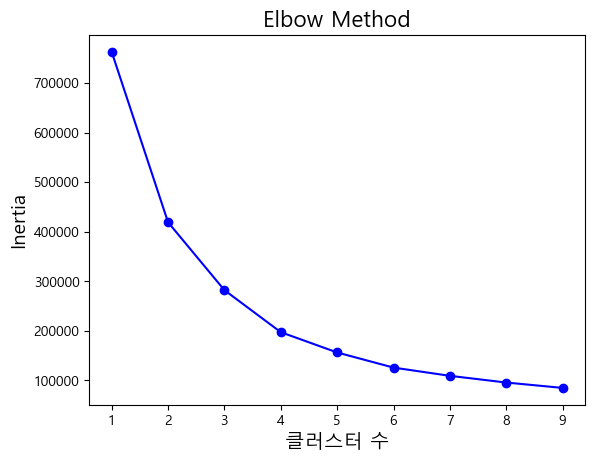

In [17]:
# elebow method 탐색
# from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 3. 최적 클러스터 수 찾기 (Elbow method)
#  inertia (관성, 총 오차 제곱합)를 담을 빈 리스트를 만든다.
# 이 값은 클러스터 안에서 각 점이 중심까지 얼마나 퍼져 있는지를 나타냄.
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(no_outlier_scaled_df)  # 이상치 제거 안한 상태에서 데이터를 클러스터링
    inertia.append(kmeans.inertia_) #클러스터 중심에서 각 점까지의 거리 제곱합 (총 오차 제곱합)을 inertia 리스트에 넣는다

plt.plot(K, inertia, 'bo-')
plt.xlabel('클러스터 수', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.title('Elbow Method', fontsize=16)
plt.show()

In [18]:
# 1. 표준화한 결과를 DataFrame으로 변환
no_outlier_scaled_df = pd.DataFrame(
    no_outlier_scaled_df, 
    columns=['scaled_event_key_counts', 'scaled_visit_count']
)

# 2. device_id와 병합
no_outlier_scaled_df['device_id'] = merged_cluster_df['device_id'].values

# 3. 결과 확인
no_outlier_scaled_df.head()


,scaled_event_key_counts,scaled_visit_count,device_id
0,98.517577,10.219450,cfa76079-ab4e-4ea1-a7df-38ceaa5ef011
1,74.022505,9.421723,75d3d156-ec70-4a0f-9070-e46aefeb79e0
2,62.352579,10.059904,5E006006-92C9-4B62-9A30-5D6E8A237D12
3,61.844870,9.262178,253b2c42-26c1-4413-bd05-a957a4eded3f
4,59.865545,10.219450,aadd58ac-9923-4ab9-928b-0ed7486fcc4c


In [19]:
from sklearn.cluster import KMeans

# 1️⃣ KMeans 모델 학습
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(no_outlier_scaled_df[['scaled_event_key_counts', 'scaled_visit_count']])

# 2️⃣ 결과를 scaled_df에 추가
no_outlier_scaled_df['cluster'] = labels

# 3️⃣ 확인
no_outlier_scaled_df.head()

,scaled_event_key_counts,scaled_visit_count,device_id,cluster
0,98.517577,10.219450,cfa76079-ab4e-4ea1-a7df-38ceaa5ef011,2
1,74.022505,9.421723,75d3d156-ec70-4a0f-9070-e46aefeb79e0,2
2,62.352579,10.059904,5E006006-92C9-4B62-9A30-5D6E8A237D12,2
3,61.844870,9.262178,253b2c42-26c1-4413-bd05-a957a4eded3f,2
4,59.865545,10.219450,aadd58ac-9923-4ab9-928b-0ed7486fcc4c,2


In [20]:
no_outlier_scaled_df

,scaled_event_key_counts,scaled_visit_count,device_id,cluster
0,98.517577,10.219450,cfa76079-ab4e-4ea1-a7df-38ceaa5ef011,2
1,74.022505,9.421723,75d3d156-ec70-4a0f-9070-e46aefeb79e0,2
2,62.352579,10.059904,5E006006-92C9-4B62-9A30-5D6E8A237D12,2
3,61.844870,9.262178,253b2c42-26c1-4413-bd05-a957a4eded3f,2
4,59.865545,10.219450,aadd58ac-9923-4ab9-928b-0ed7486fcc4c,2
...,...,...,...,...
381252,-0.382473,-0.470090,ffcff32e-29fa-4ac0-9adf-0e6900d7d895,1
381253,-0.382473,-0.470090,ffd51f10-12ee-4092-aef9-87aec615509c,1
381254,-0.382473,-0.629635,cd3503fc-01f9-49f3-95b7-ccc807ba495c,1
381255,-0.382473,-0.629635,99136A43-A881-467A-A448-75B0D41B90E5,1


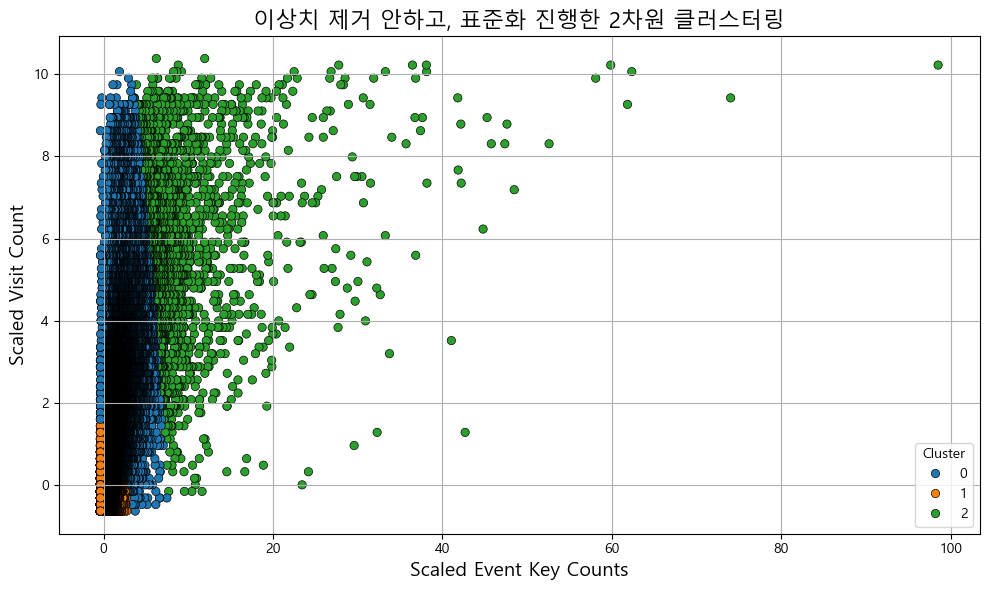

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=no_outlier_scaled_df,
    x='scaled_event_key_counts',
    y='scaled_visit_count',
    hue='cluster',
    palette='tab10',
    edgecolor='black'
)

plt.title('이상치 제거 안하고, 표준화 진행한 2차원 클러스터링', fontsize=16)
plt.xlabel('Scaled Event Key Counts', fontsize=14)
plt.ylabel('Scaled Visit Count', fontsize=14)
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [100]:
no_outlier_scaled_df['cluster'].value_counts()

cluster
1    347042
0     32636
2      1579
Name: count, dtype: int64

### 7) 이상치 제거하고 클러스터링 시각화

#### 7-1) 이상치 제거 기준 설정

In [5]:
# scaled events key counts 60이상인 데이터 개수 확인해보기
print(f"표준화 진행했을 때 scaled_event_key_counts가 20 이상인 데이터 개수 확인 : {len(no_outlier_scaled_df[no_outlier_scaled_df['scaled_event_key_counts'] >= 20])}개")

# 표준화 진행하기 전, event키 상위 115번째 데이터의 값 확인해보기
print(f"\n표준화 진행하기 전 event키 상위 115번째 데이터의 값 확인해보기 : \n{merged_cluster_df.sort_values(by='event_key_counts', ascending=False).loc[114]}")

NameError: name 'no_outlier_scaled_df' is not defined

In [ ]:
# merged_cluster_df.to_csv("C:/Users/gkdis/Codeit/04_고급프로젝트/02_data/03_pandas_data/merged_cluster_df.csv")

표준화 진행하기 전의 115번째 데이터의 event_key_count는 2773개임을 확인했다. 38만개의 데이터 중에서 115개의 데이터는 다소 적은 개수로 분석대상에서 제외하고 클러스터링을 진행한다.

In [3]:
import pandas as pd
# 데이터 불러오기 여기부터 진행
merged_cluster_df = pd.read_csv("C:/Users/gkdis/Codeit/04_고급프로젝트/02_data/03_pandas_data/merged_cluster_df.csv")

In [4]:
# 전체 데이터에서 event_key_count 상위 115개 데이터셋은 제외하고 데이터프레임 생성성
remove_outlier_df = merged_cluster_df.loc[115:]
remove_outlier_df

,Unnamed: 0,device_id,event_key_counts,visit_count
115,115,5366284B-07F7-4EF2-A412-D7FED775AED8,2771,48
116,116,33064170-05ac-4bf1-a35e-dec3e0f1744e,2767,28
117,117,2c172da5-8957-4e3c-a9a7-fff11594e8d9,2765,59
118,118,235E56C9-A2D4-4ECE-A719-AF9303E75B2B,2763,58
119,119,48F0E410-43DF-416C-BBB3-7280BBBE4D8A,2758,29
...,...,...,...,...
381252,381252,ffcff32e-29fa-4ac0-9adf-0e6900d7d895,1,2
381253,381253,ffd51f10-12ee-4092-aef9-87aec615509c,1,2
381254,381254,cd3503fc-01f9-49f3-95b7-ccc807ba495c,1,1
381255,381255,99136A43-A881-467A-A448-75B0D41B90E5,1,1


#### 7-2) KMeans 클러스터링 진행

In [5]:
# 이상치 제거 안하고 데이터 표준화 진행
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()

remove_outlier_scaled_df = scaler2.fit_transform(remove_outlier_df[['event_key_counts', 'visit_count']])

remove_outlier_scaled_df

array([[24.57971344,  6.93087636],
       [24.5435575 ,  3.71224324],
       [24.52547952,  8.70112458],
       ...,
       [-0.45828057, -0.63291149],
       [-0.45828057, -0.63291149],
       [-0.45828057, -0.31104817]], shape=(381142, 2))

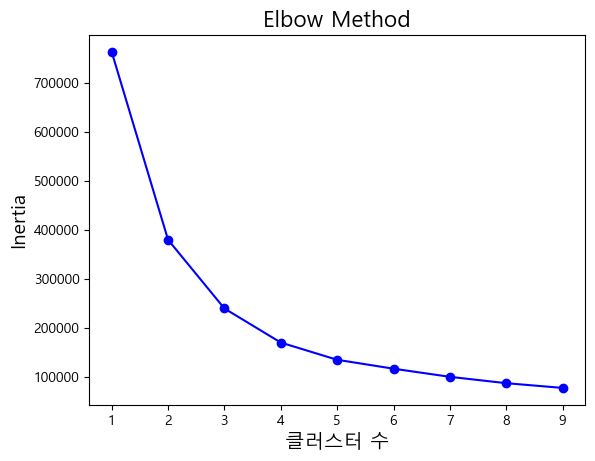

In [6]:
# elebow method 탐색
# from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 3. 최적 클러스터 수 찾기 (Elbow method)
#  inertia (관성, 총 오차 제곱합)를 담을 빈 리스트를 만든다.
# 이 값은 클러스터 안에서 각 점이 중심까지 얼마나 퍼져 있는지를 나타냄.
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(remove_outlier_scaled_df)  # 이상치 제거 안한 상태에서 데이터를 클러스터링
    inertia.append(kmeans.inertia_) #클러스터 중심에서 각 점까지의 거리 제곱합 (총 오차 제곱합)을 inertia 리스트에 넣는다

plt.plot(K, inertia, 'bo-')
plt.xlabel('클러스터 수', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.title('Elbow Method', fontsize=16)
plt.show()

In [7]:
# 1. 표준화한 결과를 DataFrame으로 변환
remove_outlier_scaled_df = pd.DataFrame(
    remove_outlier_scaled_df, 
    columns=['scaled_event_key_counts', 'scaled_visit_count']
)

# 2. device_id와 병합
remove_outlier_scaled_df['device_id'] = remove_outlier_df['device_id'].values

# 3. 결과 확인
remove_outlier_scaled_df.head()

,scaled_event_key_counts,scaled_visit_count,device_id
0,24.579713,6.930876,5366284B-07F7-4EF2-A412-D7FED775AED8
1,24.543557,3.712243,33064170-05ac-4bf1-a35e-dec3e0f1744e
2,24.525480,8.701125,2c172da5-8957-4e3c-a9a7-fff11594e8d9
3,24.507402,8.540193,235E56C9-A2D4-4ECE-A719-AF9303E75B2B
4,24.462207,3.873175,48F0E410-43DF-416C-BBB3-7280BBBE4D8A


In [8]:
from sklearn.cluster import KMeans

# 1️⃣ KMeans 모델 학습
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(remove_outlier_scaled_df[['scaled_event_key_counts', 'scaled_visit_count']])

# 2️⃣ 결과를 scaled_df에 추가
remove_outlier_scaled_df['cluster'] = labels

# 3️⃣ 확인
remove_outlier_scaled_df.head()

,scaled_event_key_counts,scaled_visit_count,device_id,cluster
0,24.579713,6.930876,5366284B-07F7-4EF2-A412-D7FED775AED8,2
1,24.543557,3.712243,33064170-05ac-4bf1-a35e-dec3e0f1744e,2
2,24.525480,8.701125,2c172da5-8957-4e3c-a9a7-fff11594e8d9,2
3,24.507402,8.540193,235E56C9-A2D4-4ECE-A719-AF9303E75B2B,2
4,24.462207,3.873175,48F0E410-43DF-416C-BBB3-7280BBBE4D8A,2


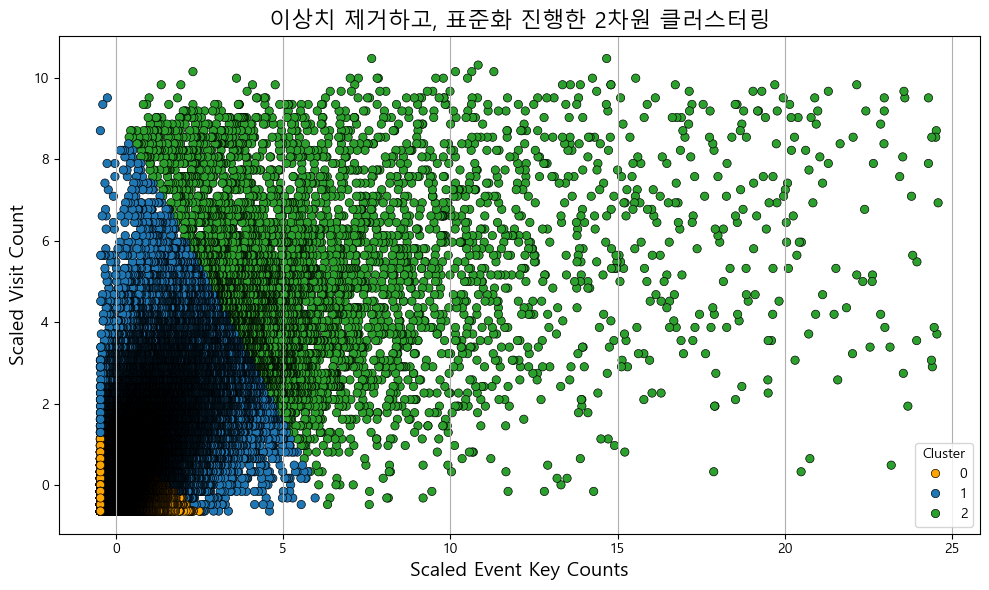

In [9]:
plt.figure(figsize=(10, 6))

# 색상 매핑 정의
cluster_palette = {
    0: '#FFA500',  # 주황
    1: '#1f77b4',  # 파랑
    2: '#2ca02c'   # 초록
}

sns.scatterplot(
    data=remove_outlier_scaled_df,
    x='scaled_event_key_counts',
    y='scaled_visit_count',
    hue='cluster',
    palette=cluster_palette,
    edgecolor='black'
)

plt.title('이상치 제거하고, 표준화 진행한 2차원 클러스터링', fontsize=16)
plt.xlabel('Scaled Event Key Counts', fontsize=14)
plt.ylabel('Scaled Visit Count', fontsize=14)
plt.legend(title='Cluster')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [10]:
remove_outlier_scaled_df['cluster'].value_counts()

cluster
0    332711
1     43876
2      4555
Name: count, dtype: int64

#### 7-3) 라이트 유저 분석

In [11]:
# 표준화 진행되기 전 데이터셋에 클러스터 번호를 붙여주기 위해 index초기화 진행
remove_outlier_df = remove_outlier_df.reset_index().drop(columns='index')

# 클러스터 번호를 표준화 진행되기 전 데이터셋에도 붙여줌
remove_outlier_df['remove_outlier_cluster'] = remove_outlier_scaled_df['cluster']

**클러스터별 평균 접속일 확인**

In [12]:
remove_outlier_df.drop(columns='Unnamed: 0', inplace=True)

In [13]:
remove_outlier_df.groupby('remove_outlier_cluster')['visit_count'].mean()

remove_outlier_cluster
0     3.136788
1    15.157102
2    37.633150
Name: visit_count, dtype: float64

In [14]:
# 클러스터 0인 유저들 분석 진행
print(f"클러스터 0인 유저 중에서 가장 높은 event_key_counts 개수 : {remove_outlier_df[remove_outlier_df['remove_outlier_cluster'] == 0]['event_key_counts'].max()}개")
remove_outlier_df[remove_outlier_df['remove_outlier_cluster'] == 0]['event_key_counts'].describe()

클러스터 0인 유저 중에서 가장 높은 event_key_counts 개수 : 327개


count    332711.000000
mean         27.551972
std          28.002658
min           1.000000
25%           8.000000
50%          18.000000
75%          38.000000
max         327.000000
Name: event_key_counts, dtype: float64

In [15]:
# 클러스터가0인 유저들 즉. 라이트 유저만 별도 데이터프레임으로 저장
remove_outlier_cluster0 = remove_outlier_df[remove_outlier_df['remove_outlier_cluster'] == 0]

# 클러스터가 0인 유저들의 event_key_counts의 중위수 값은 18이므로 18개 이하인 유저들의 행동을 파악
remove_outlier_cluster0_low_median = remove_outlier_cluster0[remove_outlier_cluster0['event_key_counts'] <= 18]

remove_outlier_cluster0_upper_median = remove_outlier_cluster0[remove_outlier_cluster0['event_key_counts'] > 18]

In [27]:
print(f"중위수 이하 유저들의 평균 방문일 : {remove_outlier_cluster0_low_median['visit_count'].mean():.2f}일")
print(f"중위수 초과 유저들의 평균 방문일 : {remove_outlier_cluster0_upper_median['visit_count'].mean():.2f}일")

중위수 이하 유저들의 평균 방문일 : 2.15일
중위수 초과 유저들의 평균 방문일 : 4.12일


In [34]:
print(f"중위수 이하 유저의 평균 이벤트키 횟수 : {remove_outlier_cluster0_low_median['event_key_counts'].mean():.2f}회")
print(f"중위수 이하 유저의 평균 이벤트키 횟수 : {remove_outlier_cluster0_upper_median['event_key_counts'].mean():.2f}회")

중위수 이하 유저의 평균 이벤트키 횟수 : 8.43회
중위수 이하 유저의 평균 이벤트키 횟수 : 46.76회


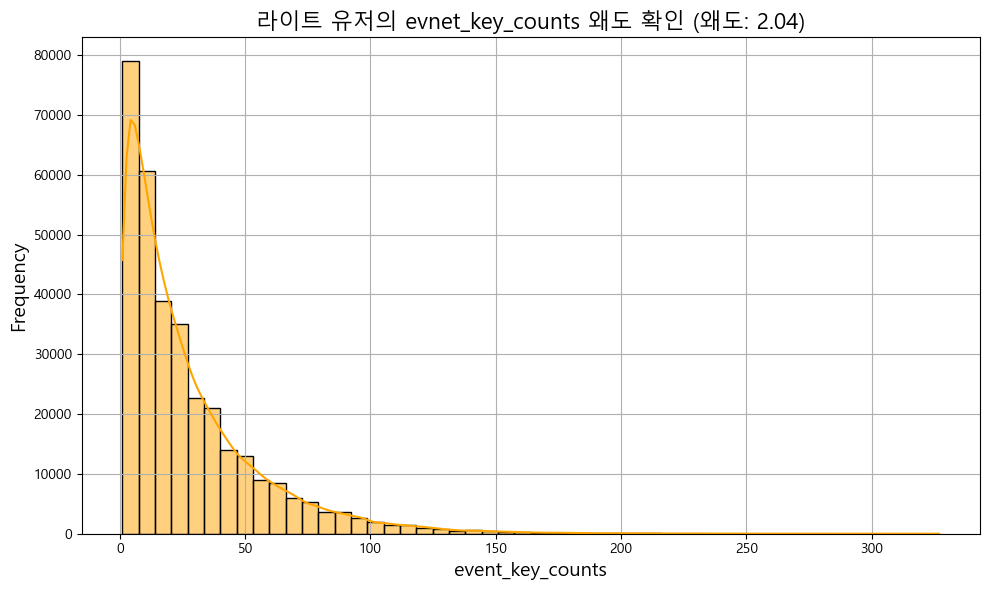

In [ ]:
# event_key_count 기준으로 왜도 시각화
import scipy.stats as stats

skewness = stats.skew(remove_outlier_cluster0['event_key_counts'])

plt.figure(figsize=(10, 6))
sns.histplot(remove_outlier_cluster0['event_key_counts'], kde=True, bins=50, color='#FFA500')
plt.title(f'라이트 유저의 evnet_key_counts 왜도 확인 (왜도: {skewness:.2f})', fontsize=16)
plt.xlabel('event_key_counts', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# 원본데이터에 device_id별로 클러스터0이며, event_key_counts 18개 이하인 유저들만 결합
df_cluster0_under_median = df.merge(remove_outlier_cluster0_low_median[['device_id', 'event_key_counts']], on='device_id', how='left').dropna(axis=0)

# 원본데이터에 device_id별로 클러스터0이며, event_key_counts 18개 초과인 유저들만 결합
df_cluster0_upper_median = df.merge(remove_outlier_cluster0_upper_median[['device_id', 'event_key_counts']], on='device_id', how='left').dropna(axis=0)

**라이트 유저, 중위수 초과, 기본 발생키 제외**

In [22]:
# 라이트 유저의 중위수 초과 유저들의 이벤트 키 발생 비율 확인
df_cluster0_upper_median = df_cluster0_upper_median[~df_cluster0_upper_median['event_key'].isin(exclude_events)]
clus0_upper = df_cluster0_upper_median['event_key'].value_counts().reset_index()
clus0_upper['ratio'] = round(clus0_upper['count'] / len(df_cluster0_upper_median) * 100, 5)
# clus0_upper.to_csv("cluster0_upper_event_key_ratio.csv", index=False)

**라이트 유저, 중위수 이하, 기본 발생키 제외**

In [23]:
# 라이트 유저의 중위수 초과 유저들의 이벤트 키 발생 비율 확인
df_cluster0_under_median = df_cluster0_under_median[~df_cluster0_under_median['event_key'].isin(exclude_events)]
clus0_under = df_cluster0_under_median['event_key'].value_counts().reset_index()
clus0_under['ratio'] = round(clus0_under['count'] / len(df_cluster0_under_median) * 100, 5)
# clus0_under.to_csv("cluster0_under_event_key_ratio.csv", index=False)

**두 집단 비교**

In [24]:
# 사용자가 업로드한 내용을 기반으로 그대로 딕셔너리 생성
custom2_group_mapping = {
    'view_questions_tap': '질문탭 진입',
    'view_timeline_tap': '받은 질문 확인',
    'click_question_open': '받은 질문 확인',
    'view_message_tap': '친구추가 및 상호작용',
    'view_profile_tap': '친구추가 및 상호작용',
    'click_bottom_navigation_questions': '질문탭 진입',
    'view_lab_tap': '신기능 확인',
    'click_question_ask': '질문 생성/건너뛰기',
    'click_bottom_navigation_profile': '친구추가 및 상호작용',
    'click_bottom_navigation_timeline': '받은 질문 확인',
    'click_question_start': '질문 생성/건너뛰기',
    'click_appbar_alarm_center': '친구추가 및 상호작용',
    'view_friendplus_tap': '친구추가 및 상호작용',
    'click_notice_detail': '친구추가 및 상호작용',
    'view_signup': '기본기능',
    'view_question_question': '질문 생성/건너뛰기',
    'view_login': '기본기능',
    'click_bottom_navigation_lab': '신기능 확인',
    'skip_question_question': '질문 생성/건너뛰기',
    'complete_question_question': '질문 생성/건너뛰기',
    'click_appbar_chat_rooms': '친구추가 및 상호작용',
    'click_notice': '기본기능',
    'view_imagine_make': '신기능 확인',
    'view_shop': '기본기능',
    'skip_question': '질문 생성/건너뛰기',
    'click_question_share': '친구추가 및 상호작용',
    'click_attendance': '기본기능',
    'click_timeline_chat_start': '친구추가 및 상호작용',
    'complete_question': '질문 생성/건너뛰기',
    'click_appbar_setting': '기본기능',
    'click_appbar_friend_plus': '친구추가 및 상호작용',
    'click_bottom_navigation_imagine': '신기능 확인',
    'click_purchase': '기본기능',
    'click_profile_ask': '친구추가 및 상호작용',
    'view_imagine_tap': '신기능 확인',
    'click_random_ask_normal': '질문 생성/건너뛰기',
    'click_random_ask_shuffle': '질문 생성/건너뛰기',
    'complete_signup': '기본기능',
    'button': '기본기능',
    'click_random_ask_other': '질문 생성/건너뛰기',
    'click_imagine_start': '신기능 확인',
    'view_imagine_profile': '신기능 확인',
    'click_autoadd_contact': '친구추가 및 상호작용',
    'click_copy_profile_link_profile': '친구추가 및 상호작용',
    'click_friend_invite': '친구추가 및 상호작용',
    'click_face_take_photo': '신기능 확인',
    'view_face_make': '신기능 확인',
    'click_invite_friend': '친구추가 및 상호작용',
    'complete_purchase': '기본기능',
    'click_face_select_photo': '신기능 확인',
    'click_face_start': '신기능 확인',
    'view_face_showroom': '신기능 확인',
    'click_imagine_copy_prompt': '신기능 확인',
    'view_imagine_facelist': '신기능 확인',
    'click_community_chat': '친구추가 및 상호작용',
    'click_imagine_share': '신기능 확인',
    'click_copy_profile_link_ask' : '친구추가 및 상호작용',
    # '$session_start' : '기본기능',
    # '$session_end': '기본기능',
    # 'launch_app': '기본기능',
    # '$properties': '기본기능',
    # 'view_home_tap' : '기본기능'
}


In [25]:
invite_events = ['click_invite_friend', 'click_friend_invite', 'click_autoadd_contact', 'view_friendplus_tap', 'click_appbar_friend_plus']

In [26]:
exclude_events

['$session_start',
 '$session_end',
 'launch_app',
 '$properties',
 'view_home_tap']

In [27]:
# 두집단에 매핑하기
clus0_upper['group'] = clus0_upper['event_key'].map(custom2_group_mapping)
clus0_under['group'] = clus0_under['event_key'].map(custom2_group_mapping)

In [28]:
clus0_under.groupby('group')['ratio'].sum()

group
기본기능            5.47253
받은 질문 확인       27.29015
신기능 확인          7.35703
질문 생성/건너뛰기     12.49509
질문탭 진입         19.66522
친구추가 및 상호작용    27.71999
Name: ratio, dtype: float64

In [29]:
clus0_upper.groupby('group')['ratio'].sum()

group
기본기능            3.36260
받은 질문 확인       29.48060
신기능 확인         13.02365
질문 생성/건너뛰기     12.20266
질문탭 진입         16.02894
친구추가 및 상호작용    25.90160
Name: ratio, dtype: float64

#### 7-4) 미들 유저, 헤비유저 event_key 분석

In [35]:
# 클러스터가1인 유저들 즉. 미들 유저만 별도 데이터프레임으로 저장
remove_outlier_cluster1 = remove_outlier_df[remove_outlier_df['remove_outlier_cluster'] == 1]

remove_outlier_cluster1['event_key_counts'].describe()
# remove_outlier_cluster1['visit_count'].describe()

count    43876.000000
mean       160.379205
std         99.748800
min          1.000000
25%         90.000000
50%        137.000000
75%        208.250000
max        711.000000
Name: event_key_counts, dtype: float64

In [36]:
# 클러스터가2인 유저들 즉. 헤비 유저만 별도 데이터프레임으로 저장
remove_outlier_cluster2 = remove_outlier_df[remove_outlier_df['remove_outlier_cluster'] == 2]

# remove_outlier_cluster2['event_key_counts'].describe()
remove_outlier_cluster2['event_key_counts'].describe()

count    4555.000000
mean      768.729967
std       447.851356
min        96.000000
25%       486.000000
50%       636.000000
75%       915.500000
max      2771.000000
Name: event_key_counts, dtype: float64

In [41]:
remove_outlier_cluster2['event_key_counts'].mean()

np.float64(768.7299670691548)

In [37]:
# 원본데이터에 device_id별로 클러스터1인 미들 유저, 클러스터2인 헤비 유저 병합
df_cluster1 = df.merge(remove_outlier_cluster1[['device_id', 'event_key_counts']], on='device_id', how='left').dropna(axis=0)
df_cluster2 = df.merge(remove_outlier_cluster2[['device_id', 'event_key_counts']], on='device_id', how='left').dropna(axis=0)

In [61]:
# 미들 유저의 중위수 초과 유저들의 이벤트 키 발생 비율 확인
df_cluster1 = df_cluster1[~df_cluster1['event_key'].isin(exclude_events)]
clus1_ratio = df_cluster1['event_key'].value_counts().reset_index()
clus1_ratio['ratio'] = round(clus1_ratio['count'] / len(df_cluster1) * 100, 5)
# clus1_upper.to_csv("cluster1_event_key_ratio.csv", index=False)

# 헤비 유저의 중위수 초과 유저들의 이벤트 키 발생 비율 확인
df_cluster2 = df_cluster2[~df_cluster2['event_key'].isin(exclude_events)]
clus2_ratio = df_cluster2['event_key'].value_counts().reset_index()
clus2_ratio['ratio'] = round(clus2_ratio['count'] / len(df_cluster2) * 100, 5)
# clus1_upper.to_csv("cluster1_event_key_ratio.csv", index=False)

# 두집단에 매핑하기
clus1_ratio['group'] = clus1_ratio['event_key'].map(custom2_group_mapping)
clus2_ratio['group'] = clus2_ratio['event_key'].map(custom2_group_mapping)

# 클러스터 1 이벤트키 비율
print(clus1_ratio.groupby('group')['ratio'].sum())
print(clus2_ratio.groupby('group')['ratio'].sum())


group
기본기능            3.99955
받은 질문 확인       27.02783
신기능 확인         10.94907
질문 생성/건너뛰기     18.24940
질문탭 진입         14.57304
친구추가 및 상호작용    25.20109
Name: ratio, dtype: float64
group
기본기능            4.30461
받은 질문 확인       24.59908
신기능 확인         10.16256
질문 생성/건너뛰기     25.69362
질문탭 진입         12.07115
친구추가 및 상호작용    23.16899
Name: ratio, dtype: float64


In [62]:
df_cluster0_under_median.drop(columns=['event_key_counts'], inplace=True)
df_cluster0_upper_median.drop(columns=['event_key_counts'], inplace=True)

KeyError: "['event_key_counts'] not found in axis"

In [ ]:
df_cluster1.drop(columns=['hour', 'date', 'weekday', 'event_key_counts'], inplace=True)
df_cluster2.drop(columns=['hour', 'date', 'weekday', 'event_key_counts'], inplace=True)

KeyError: "['hour', 'date', 'weekday'] not found in axis"

In [36]:
print(f"헤비유저 : \n{df_cluster2[df_cluster2['event_key'].isin(invite_events)].groupby('event_key')['device_id'].count().head(10)}")

헤비유저 : 
event_key
click_appbar_friend_plus    13233
click_autoadd_contact         464
click_friend_invite          1802
click_invite_friend           615
view_friendplus_tap         42921
Name: device_id, dtype: int64


In [92]:
464 + 1802 + 615

2881

In [57]:
df[(df['device_id'] == '86443BFF-324E-498B-A133-2798087315A5') & (df['event_key'] == 'click_appbar_friend_plus')]

,Asia/Seoul,event_key,device_id
22329238,2023-07-27 01:55:49,click_appbar_friend_plus,86443BFF-324E-498B-A133-2798087315A5
25172993,2023-08-01 23:40:47,click_appbar_friend_plus,86443BFF-324E-498B-A133-2798087315A5
25173098,2023-08-01 23:41:05,click_appbar_friend_plus,86443BFF-324E-498B-A133-2798087315A5
26810207,2023-08-05 22:56:46,click_appbar_friend_plus,86443BFF-324E-498B-A133-2798087315A5
26813224,2023-08-05 23:00:14,click_appbar_friend_plus,86443BFF-324E-498B-A133-2798087315A5
28376504,2023-08-09 02:51:38,click_appbar_friend_plus,86443BFF-324E-498B-A133-2798087315A5


In [39]:
df_cluster0_upper_median[df_cluster0_upper_median['event_key'] == 'click_appbar_friend_plus']

,Asia/Seoul,event_key,device_id
16658624,2023-07-10 02:00:41,click_appbar_friend_plus,c7d94c63-2bdc-408b-99c3-3af4ad1950f0
16665901,2023-07-10 02:53:40,click_appbar_friend_plus,d511cd70-7e86-4e1d-8345-c84ae3586e73
16666430,2023-07-10 02:59:00,click_appbar_friend_plus,d511cd70-7e86-4e1d-8345-c84ae3586e73
16666728,2023-07-10 03:02:03,click_appbar_friend_plus,d511cd70-7e86-4e1d-8345-c84ae3586e73
16670063,2023-07-10 03:58:19,click_appbar_friend_plus,9962c8d7-4088-4d1a-aeca-c4f0edd00b76
...,...,...,...
33162777,2023-09-03 23:55:05,click_appbar_friend_plus,3A0CBC08-D4CE-4371-82FD-DC429A932A1A
33162905,2023-09-03 23:55:56,click_appbar_friend_plus,c52fa199-7b2d-4433-a40b-17b2515e5f21
33163294,2023-09-03 23:57:22,click_appbar_friend_plus,B8926FA1-EFD2-422C-8A79-BE7C5342580A
33163726,2023-09-03 23:59:09,click_appbar_friend_plus,B8926FA1-EFD2-422C-8A79-BE7C5342580A


In [ ]:
# 클러스터 0, 중위수 이하
print(f"중위수 이하 : \n{df_cluster0_under_median[df_cluster0_under_median['event_key'].isin(invite_events)].groupby('event_key')['device_id'].count()}\n")

# 클러스터 0, 중위수 초과
print(f"중위수 초과 : \n{df_cluster0_upper_median[df_cluster0_upper_median['event_key'].isin(invite_events)].groupby('event_key')['device_id'].count()}\n")

# 클러스터 1 : 미들유저
print(f"미들유저 : \n{df_cluster1[df_cluster1['event_key'].isin(invite_events)].groupby('event_key')['device_id'].count()}\n")

중위수 이하 : 
event_key
click_appbar_friend_plus     1833
click_autoadd_contact         194
click_friend_invite            77
click_invite_friend            53
view_friendplus_tap         36114
Name: device_id, dtype: int64

중위수 초과 : 
event_key
click_appbar_friend_plus     27587
click_autoadd_contact         1697
click_friend_invite           2166
click_invite_friend            911
view_friendplus_tap         134163
Name: device_id, dtype: int64

미들유저 : 
event_key
click_appbar_friend_plus     25981
click_autoadd_contact         1381
click_friend_invite           3389
click_invite_friend           1328
view_friendplus_tap         127192
Name: device_id, dtype: int64



In [91]:
1381 + 3389 + 1328

6098

In [131]:
df_cluster1[df_cluster1['event_key'].isin(invite_events)]

,Asia/Seoul,event_key,device_id
511,2023-06-20 22:07:05,view_friendplus_tap,2594a6d0-d031-4f57-a2b3-9946259faaa7
513,2023-06-20 22:07:08,view_friendplus_tap,2594a6d0-d031-4f57-a2b3-9946259faaa7
639,2023-06-20 22:14:59,view_friendplus_tap,2594a6d0-d031-4f57-a2b3-9946259faaa7
671,2023-06-20 22:17:07,view_friendplus_tap,2594a6d0-d031-4f57-a2b3-9946259faaa7
698,2023-06-20 22:18:48,view_friendplus_tap,2594a6d0-d031-4f57-a2b3-9946259faaa7
...,...,...,...
33162601,2023-09-03 23:54:09,click_appbar_friend_plus,1BB39AB1-EF4A-421A-8B67-91DFC318296C
33163414,2023-09-03 23:57:47,click_appbar_friend_plus,1A33C199-55B6-405D-A627-FF97BE083DC0
33163426,2023-09-03 23:57:52,click_appbar_friend_plus,BC78F8BA-C961-49F0-8138-DC6B33F7E073
33163879,2023-09-03 23:59:35,click_appbar_friend_plus,BC78F8BA-C961-49F0-8138-DC6B33F7E073


In [132]:
df_cluster1[(df_cluster1['event_key'].isin(invite_events)) & (df_cluster1['device_id'] == '1BB39AB1-EF4A-421A-8B67-91DFC318296C')]

,Asia/Seoul,event_key,device_id
16138168,2023-07-09 00:15:32,view_friendplus_tap,1BB39AB1-EF4A-421A-8B67-91DFC318296C
33162200,2023-09-03 23:52:24,click_appbar_friend_plus,1BB39AB1-EF4A-421A-8B67-91DFC318296C
33162601,2023-09-03 23:54:09,click_appbar_friend_plus,1BB39AB1-EF4A-421A-8B67-91DFC318296C


#### 7-6) 클러스터별 결제율, 결제페이지 진입률 분석

In [47]:
# 전체 유저에게 event_key 붙이기기
merged_remove_outlier_df = remove_outlier_df.merge(df[['device_id', 'event_key']], on='device_id', how='left')
merged_remove_outlier_df

,device_id,event_key_counts,visit_count,remove_outlier_cluster,event_key
0,5366284B-07F7-4EF2-A412-D7FED775AED8,2771,48,2,$session_end
1,5366284B-07F7-4EF2-A412-D7FED775AED8,2771,48,2,$session_start
2,5366284B-07F7-4EF2-A412-D7FED775AED8,2771,48,2,launch_app
3,5366284B-07F7-4EF2-A412-D7FED775AED8,2771,48,2,view_home_tap
4,5366284B-07F7-4EF2-A412-D7FED775AED8,2771,48,2,$session_start
...,...,...,...,...,...
32200543,5DD5E858-C051-4A95-A621-C7CDEA426599,1,3,0,launch_app
32200544,5DD5E858-C051-4A95-A621-C7CDEA426599,1,3,0,$session_start
32200545,5DD5E858-C051-4A95-A621-C7CDEA426599,1,3,0,view_home_tap
32200546,5DD5E858-C051-4A95-A621-C7CDEA426599,1,3,0,view_home_tap


In [65]:
# 구매 페이지와 구매완료를 진행한 유저가 어떤 클러스터에 들어가 있는지 확인
purchase_df = merged_remove_outlier_df[merged_remove_outlier_df['event_key'].isin(['complete_purchase','click_purchase'])]

# 클러스터별 중복을 제외한 유저의 수 확인
only_cluster_user_counts = merged_remove_outlier_df.drop_duplicates(subset='device_id')['remove_outlier_cluster'].value_counts()

# 클러스터별 구매 페이지 접근 비율
print(f"라이트 유저의 구매 페이지 접근 비율 : {purchase_df[purchase_df['event_key'] == 'click_purchase']['remove_outlier_cluster'].value_counts().values[0] / only_cluster_user_counts.values[0] * 100:.3f}%")
print(f"미들 유저의 구매 페이지 접근 비율 : {purchase_df[purchase_df['event_key'] == 'click_purchase']['remove_outlier_cluster'].value_counts().values[1] / only_cluster_user_counts.values[1] * 100:.3f}%")
print(f"헤비 유저의 구매 페이지 접근 비율 : {purchase_df[purchase_df['event_key'] == 'click_purchase']['remove_outlier_cluster'].value_counts().values[2] / only_cluster_user_counts.values[2] * 100:.3f}%")
print("-----------------------------")
# 클러스터별 하트 결제 완료 비율
print(f"라이트 유저의 결제율 : {purchase_df[purchase_df['event_key'] == 'complete_purchase']['remove_outlier_cluster'].value_counts().values[0] / only_cluster_user_counts.values[0] * 100:.3f}%")
print(f"미들 유저의 결제율 : {purchase_df[purchase_df['event_key'] == 'complete_purchase']['remove_outlier_cluster'].value_counts().values[1] / only_cluster_user_counts.values[1] * 100:.3f}%")
print(f"헤비 유저의 결제율 : {purchase_df[purchase_df['event_key'] == 'complete_purchase']['remove_outlier_cluster'].value_counts().values[2] / only_cluster_user_counts.values[2] * 100:.3f}%")

라이트 유저의 구매 페이지 접근 비율 : 4.572%
미들 유저의 구매 페이지 접근 비율 : 28.378%
헤비 유저의 구매 페이지 접근 비율 : 82.964%
-----------------------------
라이트 유저의 결제율 : 0.533%
미들 유저의 결제율 : 2.145%
헤비 유저의 결제율 : 2.744%


In [30]:
print(f"중복을 제외한 라이트 유저의 결제 페이지 진입 건수 : {purchase_df[(purchase_df['remove_outlier_cluster'] == 0) & (purchase_df['event_key'] == 'click_purchase')].duplicated(subset='device_id').sum()}명")
print(f"중복을 제외한 미들 유저의 결제 페이지 진입 건수 : {purchase_df[(purchase_df['remove_outlier_cluster'] == 1) & (purchase_df['event_key'] == 'click_purchase')].duplicated(subset='device_id').sum()}명")
print(f"중복을 제외한 헤비 유저의 결제 페이지 진입 건수 : {purchase_df[(purchase_df['remove_outlier_cluster'] == 2) & (purchase_df['event_key'] == 'click_purchase')].duplicated(subset='device_id').sum()}명")

중복을 제외한 라이트 유저의 결제 페이지 진입 건수 : 5757명
중복을 제외한 미들 유저의 결제 페이지 진입 건수 : 5947명
중복을 제외한 헤비 유저의 결제 페이지 진입 건수 : 2080명


In [31]:
purchase_df[(purchase_df['remove_outlier_cluster'] == 2) & (purchase_df['event_key'] == 'complete_purchase')]

,device_id,event_key_counts,visit_count,remove_outlier_cluster,event_key
9920,2c172da5-8957-4e3c-a9a7-fff11594e8d9,2765,59,2,complete_purchase
246086,b985b705-a7ff-4dc0-beff-02aab5a6e068,2269,45,2,complete_purchase
360249,0A063857-F830-4564-B5C5-914498E66B43,2118,50,2,complete_purchase
379247,FBE18500-C854-4D14-899E-37A9E513D20E,2101,46,2,complete_purchase
424652,30f37688-f5cd-4e74-8c95-c2479520d91e,2032,17,2,complete_purchase
...,...,...,...,...,...
5385347,47d02035-b7da-4ecc-b778-a64b5c3c8c83,443,30,2,complete_purchase
5924300,cec33bcb-2e28-43a2-b07c-f361d1d1c585,402,36,2,complete_purchase
5952042,6DD1603C-523C-4C66-ABE7-5ADE6C830A6E,400,42,2,complete_purchase
6658603,FE28BDE6-65DE-4B0C-93E9-2FE9C6BF3139,356,56,2,complete_purchase


**클러스터별 친구추가한 기간**

**퍼널분석 진행**
- 구매한 횟수에 따라서 한번 구매한 유저 수, 두번 구매 한 유저 수....퍼널 분석을 진행

In [32]:
# 유저별로 구매한 횟수 확인
purchase_user_count_df = purchase_df[purchase_df['event_key'] == 'complete_purchase'].groupby('device_id').size().reset_index(name='count')

# 유저 클러스터 번호와 병합을 진행
purchase_cluster_count = purchase_user_count_df.merge(
    purchase_df[purchase_df['event_key'] == 'complete_purchase'][['device_id', 'remove_outlier_cluster']],
    on='device_id',
    how='left'
    )

# 중복 제거
purchase_cluster_count = purchase_cluster_count.drop_duplicates(subset='device_id')

# 클러스터별 구매 횟수 확인해보기
purchase_cluster_count.groupby('remove_outlier_cluster')['count'].value_counts().reset_index(name='purchase_cnt')

,remove_outlier_cluster,count,purchase_cnt
0,0,1,1053
1,0,2,257
2,0,3,52
3,0,4,11
4,0,5,1
5,1,1,542
6,1,2,120
7,1,3,35
8,1,4,11
9,1,5,2


**라이트유저 세부 퍼널분석**

In [77]:
# low_median = purchase_df.merge(remove_outlier_cluster0_low_median[['device_id', 'visit_count']], on='device_id', how='left')
low_median = low_median[low_median['visit_count_y'].notnull()].drop(columns='visit_count_y')

upper_median = purchase_df.merge(remove_outlier_cluster0_upper_median[['device_id', 'visit_count']], on='device_id', how='left')
upper_median = upper_median[upper_median['visit_count_y'].notnull()].drop(columns='visit_count_y')


In [88]:
upper_median[upper_median['event_key'] == 'complete_purchase'].groupby('device_id').size().reset_index(name='count').groupby('count').count()

,device_id
count,
1,1019
2,256
3,52
4,11
5,1


In [89]:
low_median[low_median['event_key'] == 'complete_purchase'].groupby('device_id').size().reset_index(name='count').groupby('count').count()


,device_id
count,
1,34
2,1


In [ ]:
# 유저별로 구매한 횟수 확인
purchase_user_count_df = purchase_df[purchase_df['event_key'] == 'complete_purchase'].groupby('device_id').size().reset_index(name='count')

# 유저 클러스터 번호와 병합을 진행
purchase_cluster_count = purchase_user_count_df.merge(
    purchase_df[purchase_df['event_key'] == 'complete_purchase'][['device_id', 'remove_outlier_cluster']],
    on='device_id',
    how='left'
    )

# 중복 제거
purchase_cluster_count = purchase_cluster_count.drop_duplicates(subset='device_id')

# 클러스터별 구매 횟수 확인해보기
purchase_cluster_count.groupby('remove_outlier_cluster')['count'].value_counts().reset_index(name='purchase_cnt')

,device_id,event_key_counts,visit_count_x,remove_outlier_cluster,event_key
6738,c5b1a6b8-2a02-4c66-933d-91dfca1a5ad0,308,1,0,click_purchase
6739,c5b1a6b8-2a02-4c66-933d-91dfca1a5ad0,308,1,0,click_purchase
6740,c5b1a6b8-2a02-4c66-933d-91dfca1a5ad0,308,1,0,click_purchase
6741,c5b1a6b8-2a02-4c66-933d-91dfca1a5ad0,308,1,0,click_purchase
6742,c5b1a6b8-2a02-4c66-933d-91dfca1a5ad0,308,1,0,click_purchase
...,...,...,...,...,...
32982,258C8CD4-90E0-499A-9C1D-CA28F7656737,19,1,0,click_purchase
32983,87ec9bfb-de5e-43be-9954-745cdfff2976,19,3,0,click_purchase
32984,EA327414-30E7-48E2-9DCE-31860589FD63,19,1,0,click_purchase
32985,EA327414-30E7-48E2-9DCE-31860589FD63,19,1,0,complete_purchase


In [ ]:
remove_outlier_cluster0_low_median

,device_id,event_key_counts,visit_count,remove_outlier_cluster
213747,0007DE79-61E4-4654-905C-EECFEF67E453,18,2,0
213748,001B643B-002D-400B-A629-F4577FDC07A2,18,1,0
213749,7941bd12-9866-4b6d-97ed-675281494e1c,18,3,0
213750,000638C3-2BC2-4068-A482-861B526B2651,18,2,0
213751,794A6225-86E9-4640-9C84-C6924A97FA33,18,5,0
...,...,...,...,...
381137,ffcff32e-29fa-4ac0-9adf-0e6900d7d895,1,2,0
381138,ffd51f10-12ee-4092-aef9-87aec615509c,1,2,0
381139,cd3503fc-01f9-49f3-95b7-ccc807ba495c,1,1,0
381140,99136A43-A881-467A-A448-75B0D41B90E5,1,1,0


In [33]:
purchase_df[purchase_df['event_key'] == 'complete_purchase'].groupby('device_id').size().reset_index(name='count').groupby('count')['device_id'].count()

count
1    1661
2     390
3      91
4      24
5       3
6       1
7       1
Name: device_id, dtype: int64

<BarContainer object of 7 artists>

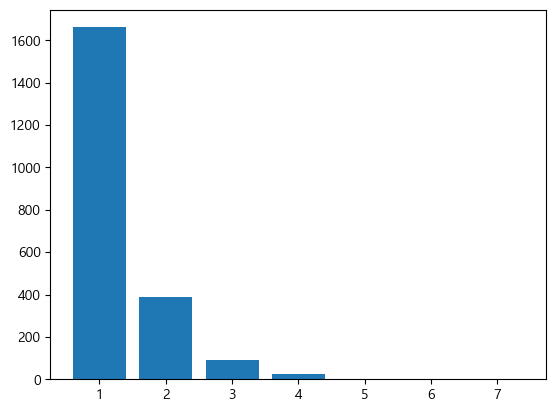

In [34]:
plt.bar(purchase_df[purchase_df['event_key'] == 'complete_purchase'].groupby('device_id').size().reset_index(name='count').groupby('count')['device_id'].count().index, purchase_df[purchase_df['event_key'] == 'complete_purchase'].groupby('device_id').size().reset_index(name='count').groupby('count')['device_id'].count().values)

### 8) 생키다이어그램

#### 8-1) 데이터 이벤트 키 그룹핑

In [46]:
# 예시 컬럼: user_id, timestamp, event_key
df['Asia/Seoul'] = pd.to_datetime(df['Asia/Seoul'])

# 6개 그룹 매핑 적용
df['event_group'] = df['event_key'].map(custom3_group_mapping)


#### 8-2) 유저별 session 흐름 추출
- 세션 구분 : `$session_start`를 기준으로 split
- `$session_start` -> 다음 행동 -> 그 다음 행동 식으로 순서쌍 생성

In [50]:
# # $session_start는 별도로 표시
# df.loc[df['event_key'] == '$session_start', 'event_group'] = '$session_start'

# # 유저, 시간 기준 정렬
# df = df.sort_values(['device_id', 'Asia/Seoul'])

# # session_id 생성 ($session_start 기준으로 누적되게)
# df['session_flag'] = df['event_key'] == '$session_start'
# df['session_id'] = df.groupby('device_id')['session_flag'].cumsum()

# # 5. session 내 event_group 추출 (session_start 이후 그룹 행동만 남기기)
# df['next_event'] = df.groupby(['device_id', 'session_id'])['event_group'].shift(-1)

# # session_start 이후 행동 흐름만
# flow_df = df[df['event_group'] == '$session_start'][['event_group', 'next_event']].dropna()

# 쌍 카운트
pair_counts = flow_df.groupby(['event_group', 'next_event']).size().reset_index(name='count')

# 6. 이후 세션 내 행동 그룹간 흐름 추출
df_session = df[df['event_group'] != '$session_start']
df_session['next_event'] = df_session.groupby(['device_id', 'session_id'])['event_group'].shift(-1)
pairs_in_session = df_session[['event_group', 'next_event']].dropna()
pairs_in_session = pairs_in_session[pairs_in_session['next_event'] != '$session_start']
pairs_in_session = pairs_in_session.groupby(['event_group', 'next_event']).size().reset_index(name='count')

# 7. 두 흐름 연결 (session_start → 그룹, 그룹 → 그룹)
combined_pairs = pd.concat([pair_counts, pairs_in_session], ignore_index=True)

# 8. Sankey 시각화 준비
all_nodes = pd.concat([combined_pairs['event_group'], combined_pairs['next_event']]).unique()
node_map = {k: v for v, k in enumerate(all_nodes)}
combined_pairs['source'] = combined_pairs['event_group'].map(node_map)
combined_pairs['target'] = combined_pairs['next_event'].map(node_map)

# 9. Sankey 다이어그램 그리기
fig = go.Figure(go.Sankey(
    node=dict(
        label=list(all_nodes),
        pad=15,
        thickness=20
    ),
    link=dict(
        source=combined_pairs['source'],
        target=combined_pairs['target'],
        value=combined_pairs['count']
    )
))

fig.update_layout(title_text="세션 기준 행동 흐름 (session_start 별도 출발)", font_size=12)
fig.show()

C:\Users\gkdis\AppData\Local\Temp\ipykernel_4324\2132580858.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### 8-3) 생키다이어그램 생성

In [44]:
import plotly.graph_objects as go

# 노드 준비
all_nodes = pd.concat([pair_counts['event_group'], pair_counts['next_event']]).unique()
node_map = {k: v for v, k in enumerate(all_nodes)}

# source/target 매핑
pair_counts['source'] = pair_counts['event_group'].map(node_map)
pair_counts['target'] = pair_counts['next_event'].map(node_map)

# Sankey 그리기
fig = go.Figure(go.Sankey(
    node=dict(
        label=list(all_nodes),
        pad=15,
        thickness=20
    ),
    link=dict(
        source=pair_counts['source'],
        target=pair_counts['target'],
        value=pair_counts['count']
    )
))

fig.update_layout(title_text="세션 행동 흐름 (6개 그룹)", font_size=12)
fig.show()


In [52]:
# 1. 데이터 전처리
df['Asia/Seoul'] = pd.to_datetime(df['Asia/Seoul'])

# 2. 이벤트 그룹핑 (custom2_group_mapping 사용)
df['event_group'] = df['event_key'].map(custom3_group_mapping).fillna('기타')
df.loc[df['event_key'] == '$session_start', 'event_group'] = '$session_start'

# 3. 시간순 정렬
df = df.sort_values(['device_id', 'Asia/Seoul'])

# 4. 세션 ID 생성
df['session_flag'] = df['event_key'] == '$session_start'
df['session_id'] = df.groupby('device_id')['session_flag'].cumsum()

# 5. 세션 내 순서 넘버링
df['event_order'] = df.groupby(['device_id', 'session_id']).cumcount()

# 6. 세션별 행동 0($session_start), 1, 2만 필터링
df_short = df[df['event_order'] <= 2]

# 7. 세션 ID + 순서 기반으로 pivot → 넓은 형태로 (step0, step1, step2)
pivot_df = df_short.pivot_table(index=['device_id', 'session_id'], columns='event_order', values='event_group', aggfunc='first').dropna()

pivot_df.columns = ['step0', 'step1', 'step2']

# 8. 쌍 카운트 (step0 → step1, step1 → step2)
step0_1 = pivot_df.groupby(['step0', 'step1']).size().reset_index(name='count')
step1_2 = pivot_df.groupby(['step1', 'step2']).size().reset_index(name='count')

# 9. 노드 준비
all_nodes = pd.concat([step0_1['step0'], step0_1['step1'], step1_2['step2']]).unique()
node_map = {k: v for v, k in enumerate(all_nodes)}

# 10. source, target 매핑
step0_1['source'] = step0_1['step0'].map(node_map)
step0_1['target'] = step0_1['step1'].map(node_map)
step1_2['source'] = step1_2['step1'].map(node_map)
step1_2['target'] = step1_2['step2'].map(node_map)

# 11. 결합
final_links = pd.concat([step0_1[['source', 'target', 'count']], step1_2[['source', 'target', 'count']]])

# 12. Sankey 그리기
fig = go.Figure(go.Sankey(
    node=dict(
        label=list(all_nodes),
        pad=15,
        thickness=20
    ),
    link=dict(
        source=final_links['source'],
        target=final_links['target'],
        value=final_links['count']
    )
))

fig.update_layout(title_text="세션 기준 3스텝 생키 (session_start → 행동1 → 행동2)", font_size=12)
fig.show()


In [53]:
# ... 이전 파이프라인 그대로 유지

# 11. 결합
final_links = pd.concat([step0_1[['source', 'target', 'count']], step1_2[['source', 'target', 'count']]])

# ⭐ Self-loop 제거 (중요)
final_links = final_links[final_links['source'] != final_links['target']]

# 12. Sankey 그리기
fig = go.Figure(go.Sankey(
    node=dict(
        label=list(all_nodes),
        pad=15,
        thickness=20
    ),
    link=dict(
        source=final_links['source'],
        target=final_links['target'],
        value=final_links['count']
    )
))

fig.update_layout(title_text="Self-loop 제거된 3스텝 생키", font_size=12)
fig.show()


대상 

In [56]:
import plotly.express as px
import pandas as pd

# 예시 데이터 (너의 session_id, 행동1, 행동2)
df_icicle = pivot_df.reset_index()

# Plotly Icicle 사용 (Alluvial 느낌)
fig = px.icicle(
    df_icicle,
    path=['step0', 'step1', 'step2'],  # 계층 순서
    title="세션 행동 흐름 (Alluvial 느낌 Icicle Chart)",
    values=None  # 자동으로 count 처리됨
)

fig.show()
